In [151]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Problem statement
Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

In [152]:
data = pd.read_csv('data/scaler_clustering.csv')

In [153]:
data =data.sample(frac=1 , random_state=42)

In [154]:
data.rename(columns={'Unnamed: 0' : 'id'} , inplace=True) 

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205843 entries, 189818 to 121958
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 12.6+ MB


In [156]:
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

0
0


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205843 entries, 189818 to 121958
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 12.6+ MB


In [158]:
data.describe()

,id,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


1. min org year is 0  and max is 20165  -- this seem wrong entry 
2. ctc min is 2 and max is -- this seems worng entry 


In [159]:
data.isna().sum()/data.shape[0]

id                  0.000000
company_hash        0.000214
email_hash          0.000000
orgyear             0.000418
ctc                 0.000000
job_position        0.255360
ctc_updated_year    0.000000
dtype: float64

1. job_position  has almost 25% missing values

In [160]:
data.head()

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
189818,190756,vnxaxc,e2b961cf0e0fb48019912984ab9baab856a4ac8f19f3df...,2018.0,600000,FullStack Engineer,2019.0
126587,126989,uhmrxwxo ovuxtzn,6ea566f60dd5803cc3adee080337379360a3d734c4ee8a...,2011.0,900000,Android Engineer,2019.0
186392,187300,otznxtg,a99c2f235aa83ae355a0a61ee9c7b9e7f684b3284485d3...,2015.0,1150000,Backend Engineer,2019.0
57218,57290,fton vsxrt rvmo,7dfab469864858274a722ae3dc2224ceff6d4b65fbdf97...,2013.0,1600000,NaN,2021.0
99723,99934,xzegojo,0216365626735c67ce00310155b3a2d62a276fcf9bff70...,2018.0,600000,FullStack Engineer,2020.0


# eda

In [161]:
data['company_hash'] =data['company_hash'].apply(lambda x : x.lower().strip() if not pd.isna(x) else pd.NA )
data['email_hash'] =data['email_hash'].apply(lambda x : x.lower().strip()  if not pd.isna(x) else pd.NA)
data['job_position'] =data['job_position'].apply(lambda x : x.lower().strip()  if not pd.isna(x) else pd.NA )

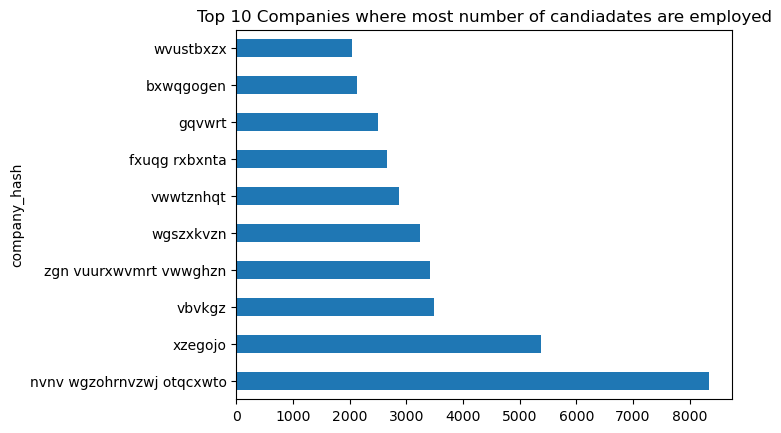

Number of unique  employers :  37299


In [162]:


data['company_hash'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Companies where most number of candiadates are employed')
plt.show()
print("Number of unique  employers : ",data['company_hash'].nunique())

In [163]:
# ctc in lakhs 
data['ctc'] = data['ctc']/100000

data.sort_values(by='ctc',  ascending=False, inplace=True)

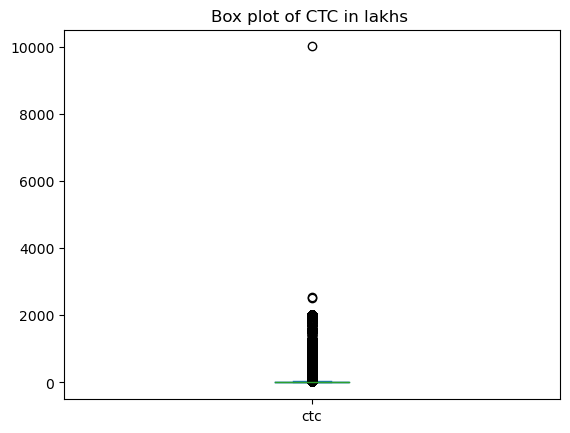

In [164]:
data['ctc'].plot(kind='box')
plt.title('Box plot of CTC in lakhs ')
plt.show()

*  People have  very large salary greater than 2000 lpa which very rare 
*  People have  very small salary less than 1 lakhs which very rare 

#### cleaning string

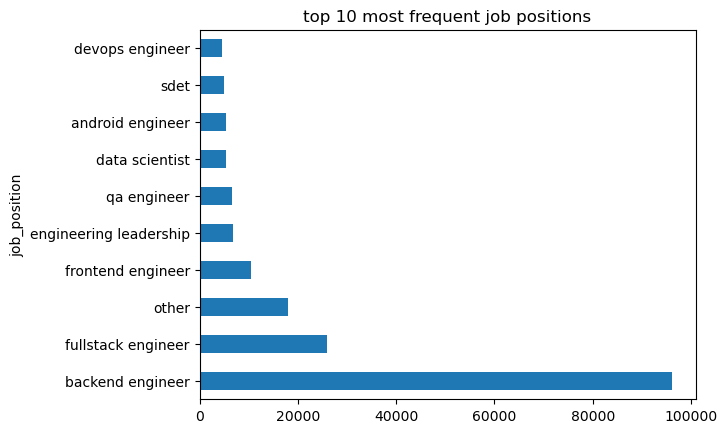

 Number of unique job positions :  899
 Number of unique email ids :  153443


In [165]:
# removing special characters
# removing extra spaces
# lowercasing
# filling missing values with 'other'
# fill missing values with mode
data['job_position'] =data['job_position'].fillna(data['job_position'].mode()[0])
data['job_position'] =data['job_position'].apply(lambda x : (re.sub('[^A-Za-z0-9 ]+', '', x).lower().strip()) if pd.isna(x)==False else x)
data['job_position'].value_counts().head(10).plot(kind='barh')
plt.title("top 10 most frequent job positions")
plt.show()

print(" Number of unique job positions : ",data['job_position'].nunique())
print(" Number of unique email ids : ",data['email_hash'].nunique())


In [166]:
# drop data where company_hash and orgyear is na 

data.dropna(inplace=True)
data['orgyear']  =data['orgyear'].apply(lambda x : int(x))
data['ctc_updated_year']  =data['ctc_updated_year'].apply(lambda x : int(x))

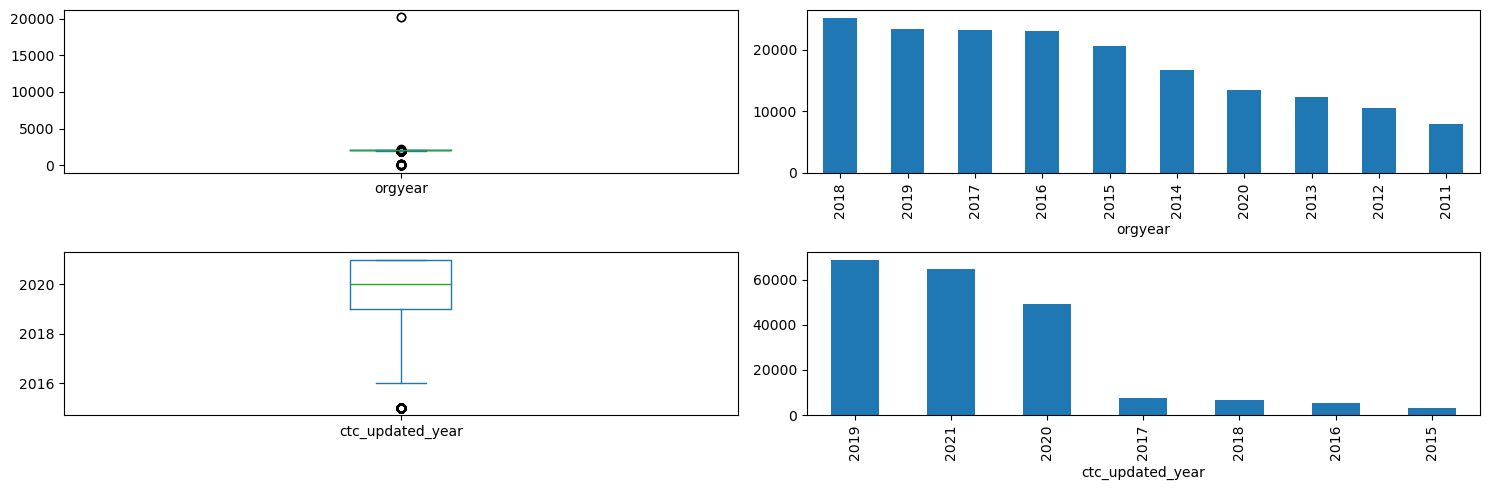

In [167]:
# create subplots
fig , axis  = plt.subplots(2,2,figsize=(15,5))

# plot histogram

data['orgyear'].plot(kind='box',ax=axis[0,0])
data['orgyear'].value_counts().head(10).plot(kind='bar' , ax=axis[0,1])
data['ctc_updated_year'].plot(kind='box',ax=axis[1,0])
data['ctc_updated_year'].value_counts().head(10).plot(kind='bar' , ax=axis[1,1])
plt.tight_layout()


* min join date is 1986  and max is  2021
* most frequent orgyear is 2018


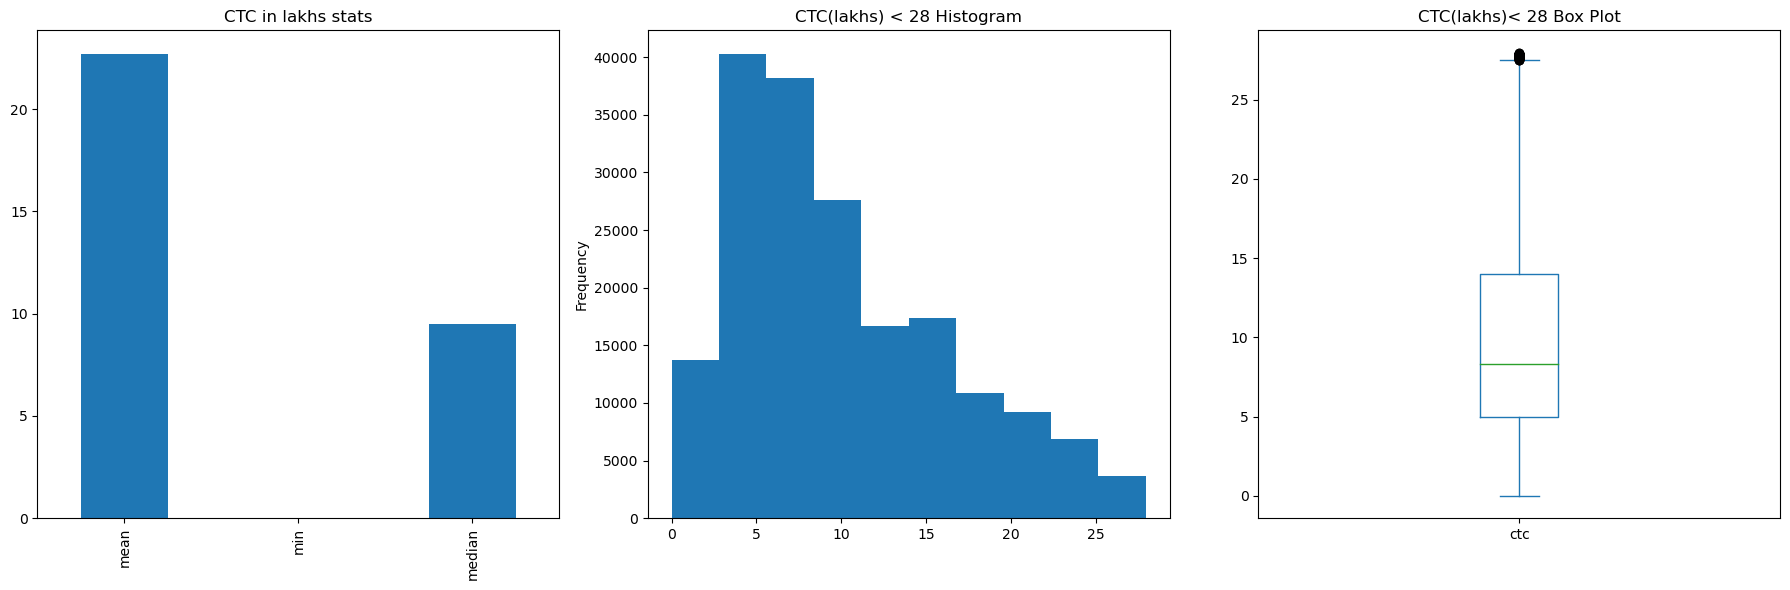

In [168]:


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First subplot: Bar plot for mean, min, median
data['ctc'].agg(['mean','min', 'median']).plot(kind='bar', ax=axes[0])
axes[0].set_title("CTC in lakhs stats")

# Second subplot: Histogram for CTC < 28
data[data['ctc'] < 28]['ctc'].plot(kind='hist', ax=axes[1])
axes[1].set_title("CTC(lakhs) < 28 Histogram")

# Third subplot: Box plot for CTC < 28
data[data['ctc'] < 28]['ctc'].plot(kind='box', ax=axes[2])
axes[2].set_title("CTC(lakhs)< 28 Box Plot")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


* salary is highly right skewed 


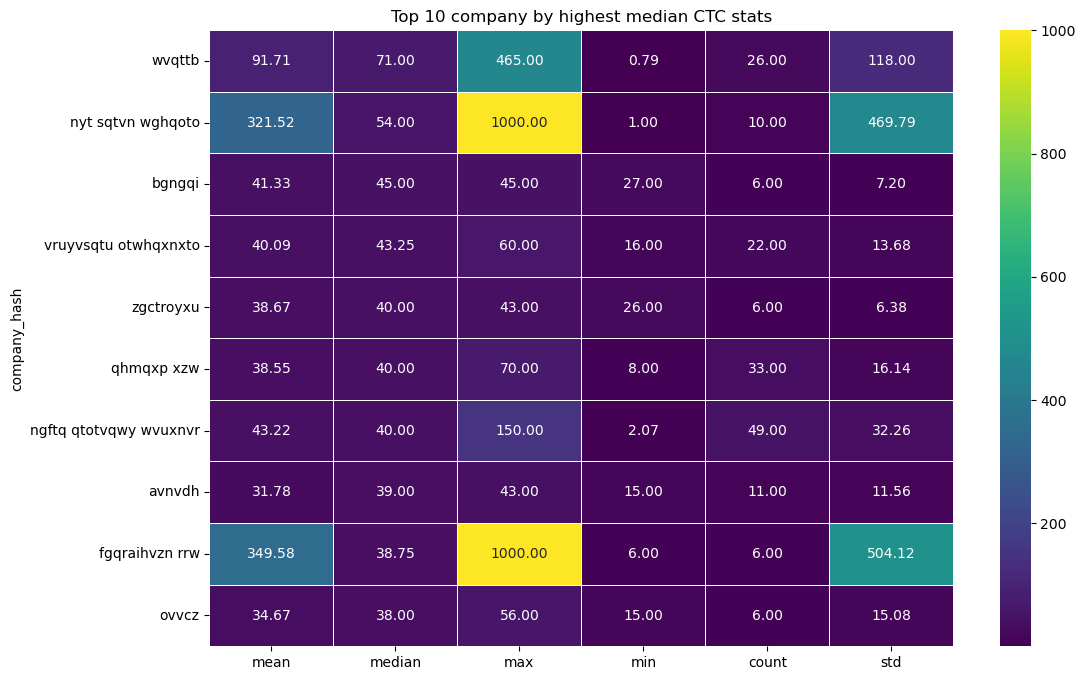

In [169]:

agg_data = data.groupby('company_hash')['ctc'].agg(['mean','median','max','min','count' ,'std']).sort_index()
agg_data =agg_data[agg_data['count']>5].sort_values(by=['median'] , ascending=False).head(10 )

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(agg_data, annot=True ,fmt=".2f", cmap='viridis', linewidths=.5)

# Set the title
plt.title("Top 10 company by highest median CTC stats")

# Display the heatmap
plt.show()


* outlier are making mean very unreliable 
* Large  std of ctc are clear indicator large salary range 

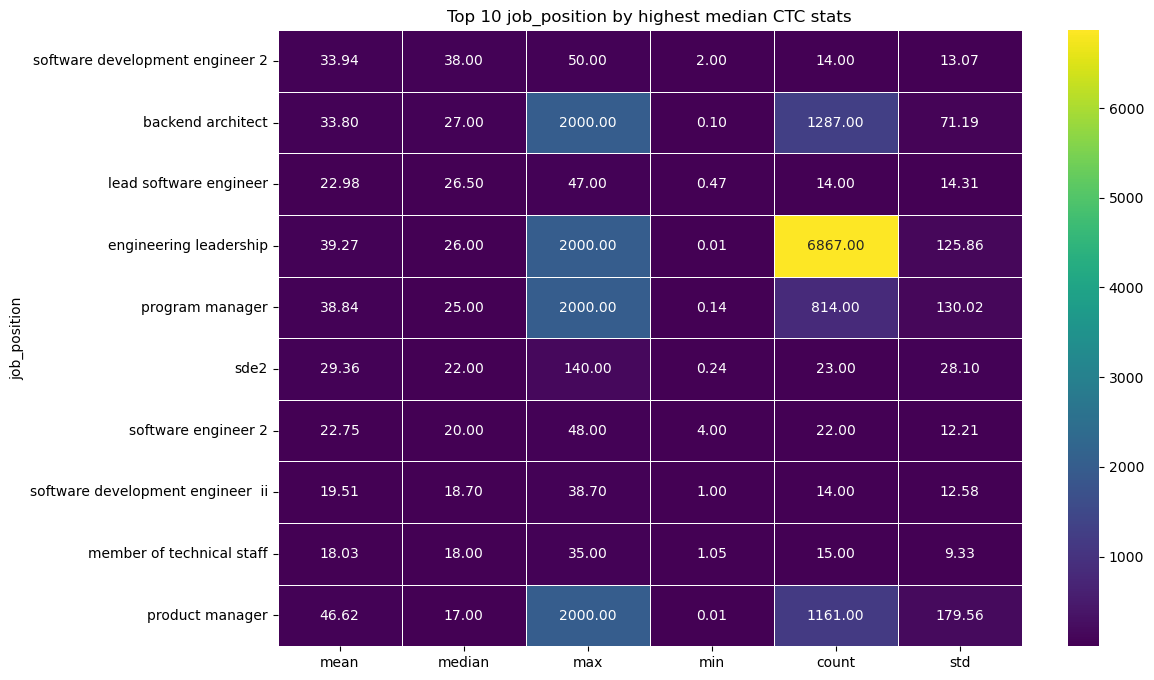

In [170]:

agg_data = data.groupby('job_position')['ctc'].agg(['mean','median','max','min','count' ,'std']).sort_index()
agg_data =agg_data[agg_data['count']>10].sort_values(by=['median'] , ascending=False).head(10 )

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(agg_data, annot=True ,fmt=".2f", cmap='viridis', linewidths=.5)

# Set the title
plt.title("Top 10 job_position by highest median CTC stats")

# Display the heatmap
plt.show()


* Top earner job position is software development engineer 2 based on median salary 
*  There are many job position with high variation is salary example product manager , program manager , engineering leadership/

# remove outliers   

In [171]:

# Detect outliers
mean_ctc = data['ctc'].mean()
std_ctc = data['ctc'].std()
median_ctc = data['ctc'].median()


upper_threshold = mean_ctc + (2.5* std_ctc)
lower_threshold = mean_ctc - (.17* std_ctc)
print(f"upper_threshold :{ upper_threshold} , lower_threshold :{ lower_threshold}")

# filling with median
data['ctc'] = np.where((data['ctc'] > upper_threshold) | (data['ctc'] <lower_threshold), median_ctc, data['ctc'])




upper_threshold :317.7353635981371 , lower_threshold :2.651406082804474


In [172]:
temp =data[data['orgyear']  > 2024]
print('how can joining date be more then current year ')
print(temp['orgyear'].value_counts().T)

# removing those data 
data.drop(index =temp.index,inplace=True)

# joining date less then 1970 should be very rare removing it 
temp =data[data['orgyear']<1970]

print('joining date less then 1970 should be very rare removing it ')
print(temp['orgyear'].value_counts().T)
# removing those data 
data.drop(index =temp.index,inplace=True)
del temp

how can joining date be more then current year 
orgyear
2025     13
2026      9
2029      5
2031      5
2028      4
20165     2
2107      1
2204      1
2101      1
2106      1
2027      1
Name: count, dtype: int64
joining date less then 1970 should be very rare removing it 
orgyear
0       17
3        6
2        3
91       3
1        2
5        2
6        2
201      1
1900     1
38       1
200      1
4        1
206      1
83       1
208      1
209      1
Name: count, dtype: int64


In [173]:

data['Years_of_Experience']=data['ctc_updated_year']- data['orgyear']
print("since year of experience can be negative we will remove it")
temp =data[data['orgyear']  > data['ctc_updated_year']   ]

data.drop(index =temp.index,inplace=True)
print("removing year of experience  which occurance is less then 30")
x =data['Years_of_Experience'].value_counts()
yoe =x[x<30].index.values
data=data[~data['Years_of_Experience'].isin(yoe)]

del x ,yoe ,temp

since year of experience can be negative we will remove it
removing year of experience  which occurance is less then 30


* employee start date > ctc_updated_year  
* This could be erronous data -- did employee not get hike when joining.

# feature engineering

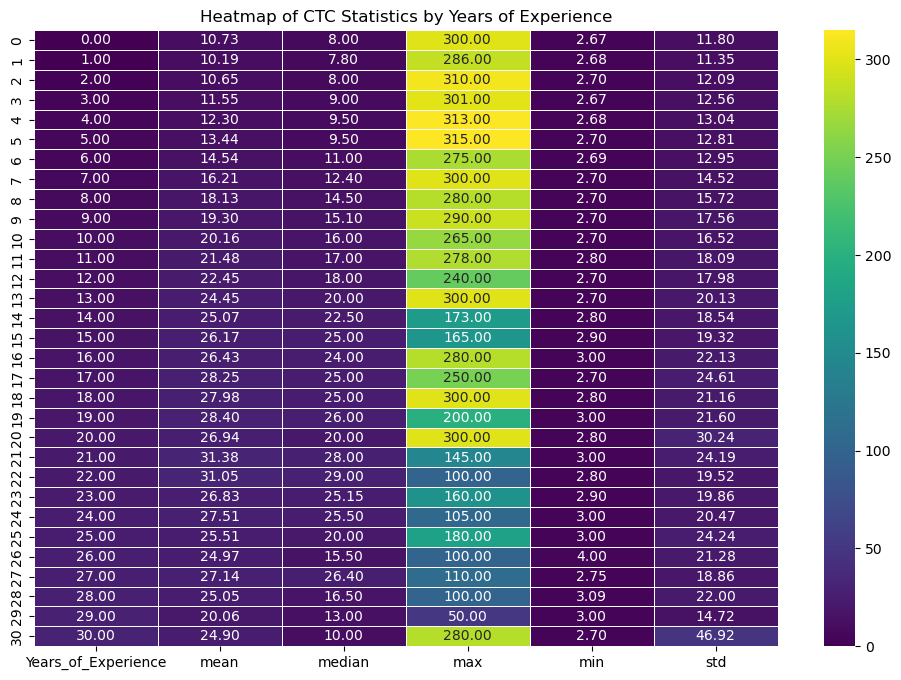

In [174]:


agg_data = data.groupby('Years_of_Experience')['ctc'].agg(['mean','median','max','min','count' ,'std']).sort_index()

agg_data =agg_data.reset_index().drop(['count'],axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(agg_data, annot=True ,fmt=".2f", cmap='viridis', linewidths=.5)


plt.title("Heatmap of CTC Statistics by Years of Experience")


plt.show()

del agg_data

- All levels of Years of Experience have very high maximum CTC values.
- Individuals with 0 years of experience have an exceptionally high CTC, almost 300 LPA, which is significantly higher than that of more experienced individuals.

# manual clustering 

* compared to market average how there median salary faring  by employee , job_position , compamy , yoe 


In [175]:
    
q1 =data['ctc'].quantile(0.25)
q3 =data['ctc'].quantile(0.75)

def bin_ctc(x ,q1 =q1 ,q9 =q3) :
    """_summary_

    Args:
        x (_type_): {high : 1 , medium : 2 , low : 3}

    Returns:
        _type_: _description_
    """
    if x>=q9:
        return "high"
    elif x>q1  and  x<q9:
        return 'medium'
    elif x<=q1:
        return 'low'


 
 

def feature_mapper( vals , group_columns , mapper): 

    mapper_value =vals[group_columns]

    ctc = vals['ctc']
    if  not isinstance(mapper_value ,str ) and not  isinstance(mapper_value , int ):
        mapper_value = list(mapper_value.values)
        mapper_value.append(0.25)
        q1_k = tuple(mapper_value)
        mapper_value = list(mapper_value[:-1])
        mapper_value.append(0.75)
        q3_k = tuple(mapper_value)
        q1 =mapper.get(q1_k)
        q3 = mapper.get(q3_k)
        return bin_ctc(ctc , q1 ,q3)
    q1 =mapper.get((mapper_value,0.25))
    q3 = mapper.get((mapper_value,0.75))
    return bin_ctc(ctc , q1 ,q3)


def feature_mapper_with_respect_to_market( vals , q1 , q3 ):
    ctc = vals['ctc']
    return bin_ctc(ctc , q1 ,q3)
    


In [176]:
labels = ['0-6', '6-12', '12-18', '18-24', '24-30']
bins = [0, 6, 12, 18, 24, 30]

data['Years_of_Experience_binned'] = pd.cut(data['Years_of_Experience'], bins=bins, labels=labels, right=False)

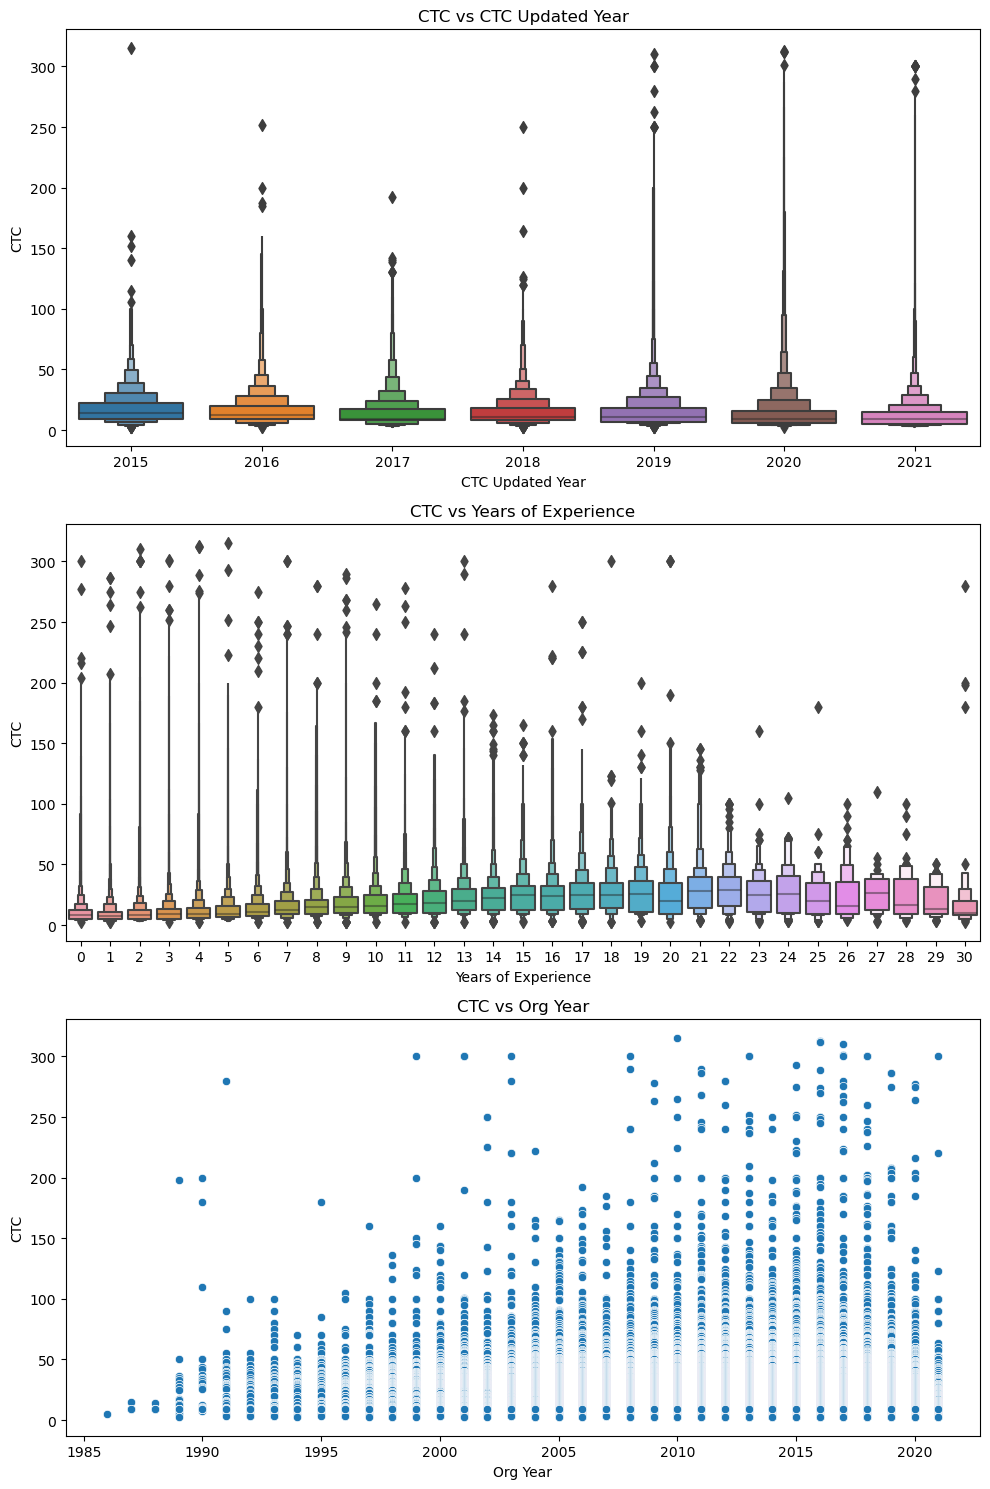

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(3, 1, figsize=(10, 15))


sns.boxenplot(x=data['ctc_updated_year'], y=data['ctc'], ax=axes[0])
axes[0].set_title('CTC vs CTC Updated Year')
axes[0].set_xlabel('CTC Updated Year')
axes[0].set_ylabel('CTC')


sns.boxenplot(x=data['Years_of_Experience'], y=data['ctc'], ax=axes[1])
axes[1].set_title('CTC vs Years of Experience')
axes[1].set_xlabel('Years of Experience')
axes[1].set_ylabel('CTC')


sns.scatterplot(x=data['orgyear'], y=data['ctc'], ax=axes[2])
axes[2].set_title('CTC vs Org Year')
axes[2].set_xlabel('Org Year')
axes[2].set_ylabel('CTC')



# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


- There is high variablity in salaries for 0-15 years of experience , some earn very low some very high 

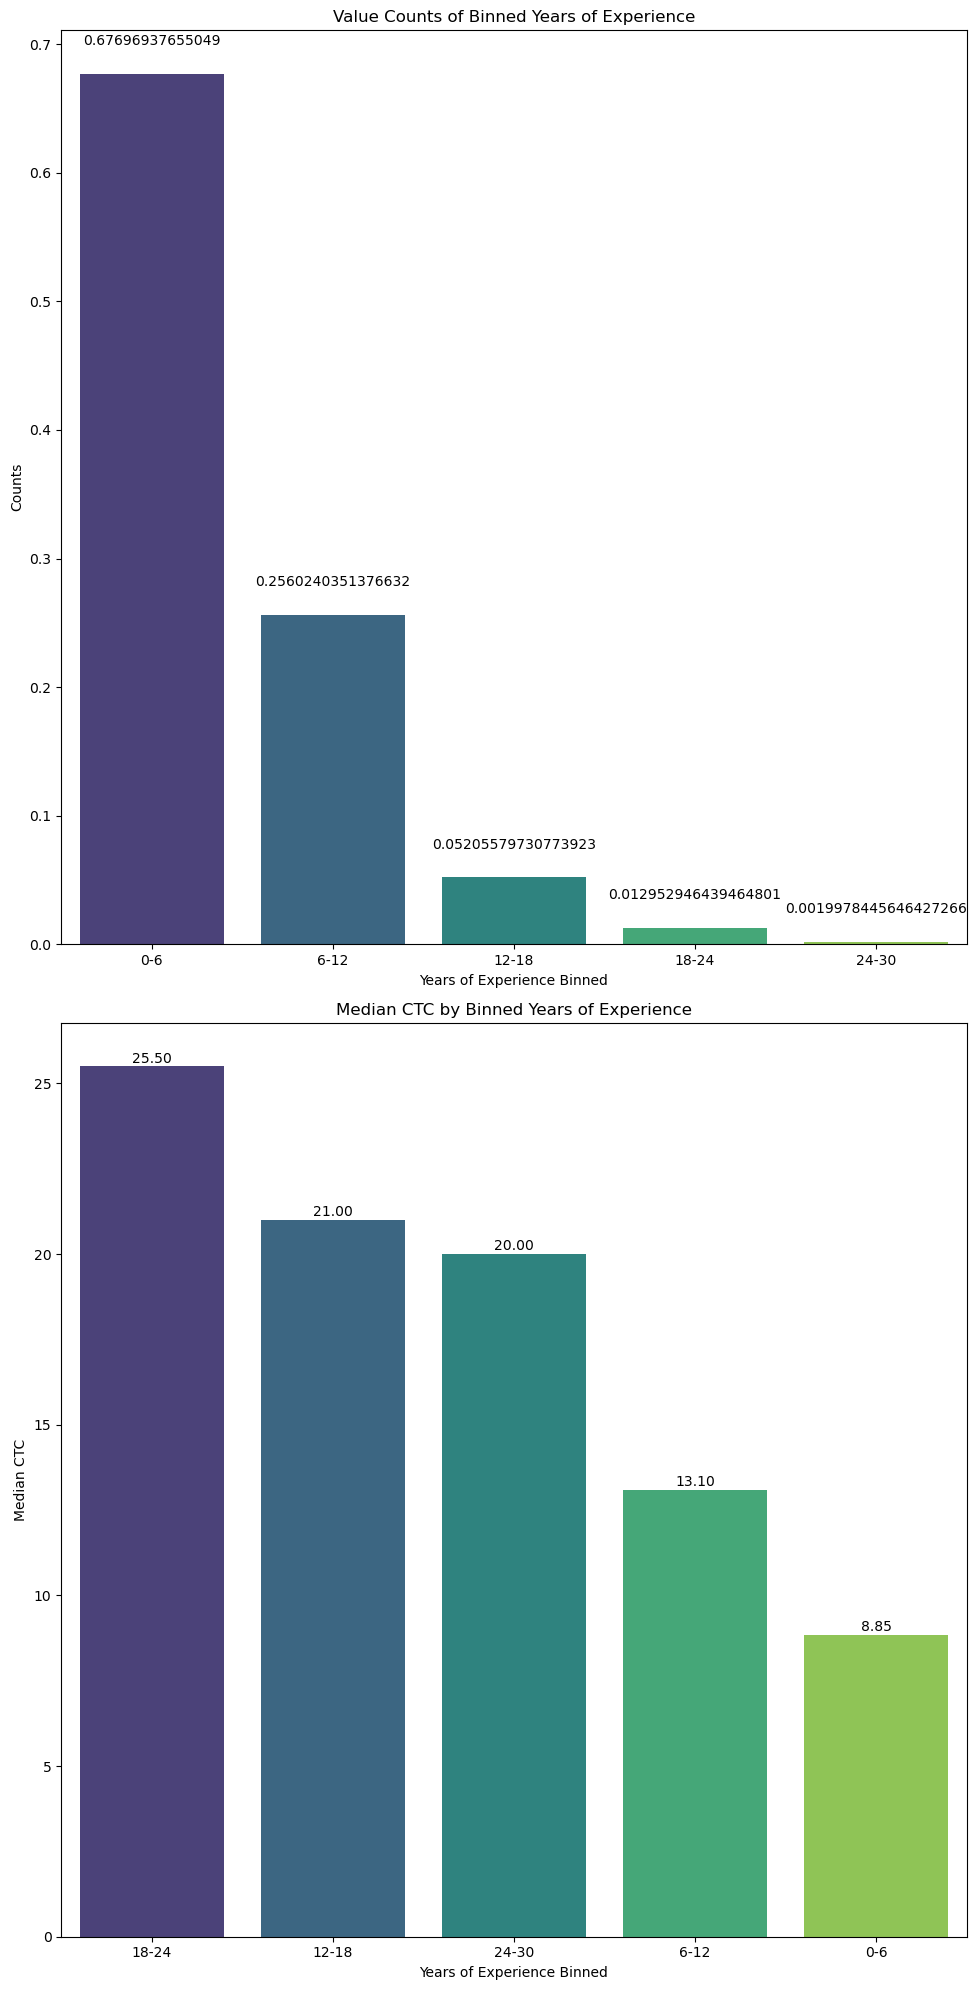

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

value_counts = data['Years_of_Experience_binned'].value_counts( normalize=True)
median_ctc = data.groupby('Years_of_Experience_binned')['ctc'].median().sort_values(ascending=False)
std_ctc = data.groupby('Years_of_Experience_binned')['ctc'].std().sort_values(ascending=False)


fig, axes = plt.subplots(2, 1, figsize=(10, 20))

sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0], palette="viridis" , order=value_counts.index)
axes[0].set_title('Value Counts of Binned Years of Experience')
axes[0].set_xlabel('Years of Experience Binned')
axes[0].set_ylabel('Counts')


for i, v in enumerate(value_counts.values):
    axes[0].text(i, v + 0.02, f'{v}', ha='center', va='bottom')


sns.barplot(x=median_ctc.index, y=median_ctc.values, ax=axes[1], palette="viridis" , order=median_ctc.index)
axes[1].set_title('Median CTC by Binned Years of Experience')
axes[1].set_xlabel('Years of Experience Binned')
axes[1].set_ylabel('Median CTC')

for i, v in enumerate(median_ctc.values):
    axes[1].text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')



plt.tight_layout()

plt.show()





* 67% of the datapoint is in 0-6 years of experience
* less then 1% of datapoint is in 24-30 years of experience
* 18-24 years of experience has the highest  median CTC
* 0-6 yoe has lowest median ctc

In [179]:
data.drop(columns=['Years_of_Experience_binned'],inplace=True)

### feature defination
* company_ctc_bin -- employee earning more than company avg 
* job_position_ctc_bin -- employee earning more than job position avg
* Years_of_Experience_ctc_bin -- employee earning more than years of experience avg
* employee_ctc_with_respect_to_market_bin -- employee earning more than market average ctc

In [180]:
company_ctc_bin =data.groupby('company_hash')['ctc'].quantile([0.25,0.75]).to_dict()
data['company_ctc_bin']=data.apply(lambda vals: feature_mapper(vals, group_columns ='company_hash' , mapper = company_ctc_bin) , axis=1)

job_position_ctc_bin =data.groupby('job_position')['ctc'].quantile([0.25,0.75]).to_dict()
data['job_position_ctc_bin'] =data.apply(lambda vals: feature_mapper(vals, group_columns ='job_position' , mapper = job_position_ctc_bin) , axis=1)

data['employee_ctc_with_respect_to_market_bin'] =data.apply(lambda vals: feature_mapper_with_respect_to_market (vals , q1, q3), axis=1)
Years_of_Experience_ctc_bin =data.groupby('Years_of_Experience')['ctc'].quantile([0.25,0.75]).to_dict()
data['Years_of_Experience_ctc_bin'] =data.apply(lambda vals: feature_mapper(vals, group_columns ='Years_of_Experience' , mapper = Years_of_Experience_ctc_bin) , axis=1)

del company_ctc_bin , job_position_ctc_bin , Years_of_Experience_ctc_bin

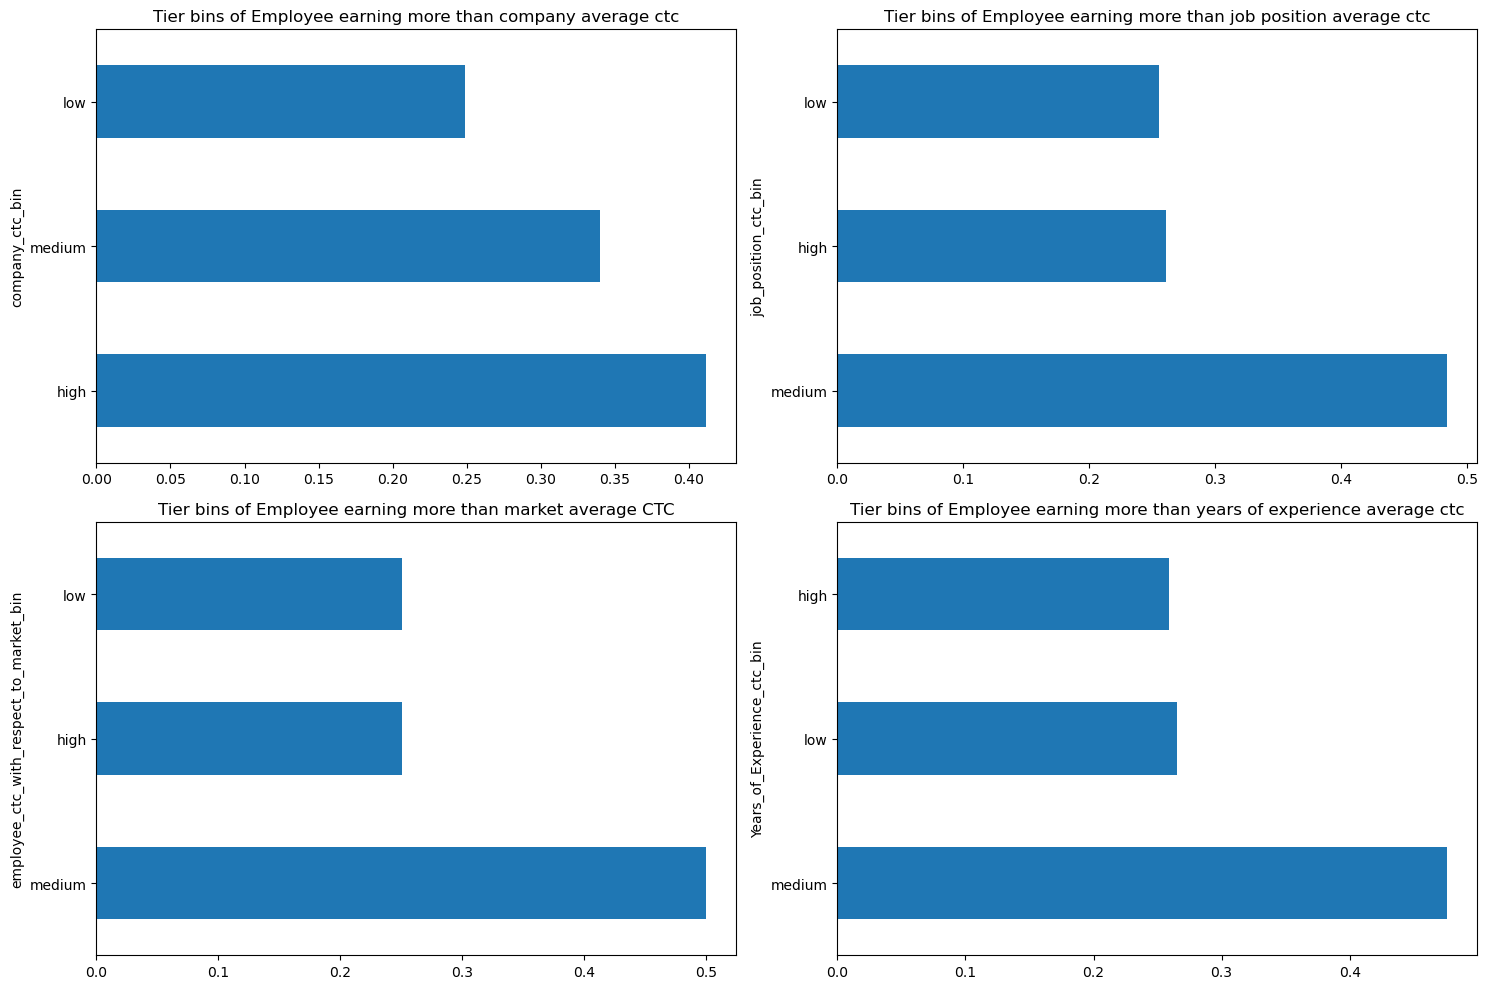

In [181]:
binned_features =[x  for x in data.columns  if 'bin'  in x] 




bin_descriptions = {
    "company_ctc_bin": "Tier bins of Employee earning more than company average ctc",
    "job_position_ctc_bin": "Tier bins of Employee earning more than job position average ctc",
    "Years_of_Experience_ctc_bin": "Tier bins of Employee earning more than years of experience average ctc",
    "employee_ctc_with_respect_to_market_bin": "Tier bins of Employee earning more than market average CTC"
}


n_features = len(binned_features)
n_cols = 2
n_rows = (n_features + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

axes = axes.flatten()

for i, x in enumerate(binned_features):
    ax = axes[i]
    data[x].value_counts(normalize=True).plot(kind='barh', ax=ax)
    ax.set_title(bin_descriptions.get(x))


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



1. **Company CTC Bin**:
   - **High**: 41.12% of employees earn more than the company's average CTC.
   - **Medium**: 34.02% of employees earn around the company's average CTC.
   - **Low**: 24.87% of employees earn less than the company's average CTC.
   
   **Insight**: A significant portion of employees (41.12%) are earning well above the company average, indicating a possible skew towards higher compensation within the company.

2. **Job Position CTC Bin**:
   - **Medium**: 48.35% of employees earn around the job position's average CTC.
   - **High**: 26.11% of employees earn more than the job position's average CTC.
   - **Low**: 25.54% of employees earn less than the job position's average CTC.
   
   **Insight**: The majority of employees (48.35%) are earning around the average CTC for their job position, with relatively equal distributions among those earning more and less than the average.

3. **Employee CTC with Respect to Market Bin**:
   - **Medium**: 49.94% of employees earn around the market average CTC.
   - **High**: 25.03% of employees earn more than the market average CTC.
   - **Low**: 25.03% of employees earn less than the market average CTC.
   
   **Insight**: Nearly half of the employees (49.94%) earn around the market average, with the remaining employees evenly split between earning more and less than the market average.

4. **Years of Experience CTC Bin**:
   - **Medium**: 47.56% of employees earn around the average CTC for their years of experience.
   - **Low**: 26.54% of employees earn less than the average CTC for their years of experience.
   - **High**: 25.90% of employees earn more than the average CTC for their years of experience.
   
   **Insight**: Most employees (47.56%) earn around the average CTC for their years of experience, with the distribution of those earning more and less being relatively balanced.

### General Insights:

1. **Balance in Earnings**:
   - Across all four binned features, a considerable proportion of employees are earning around the average for their respective bins (company, job position, market, and years of experience).

2. **Higher Earners**:
   - The **Company CTC Bin** stands out with a notably higher percentage of employees earning well above the company's average CTC (41.12%).

3. **Medium Tier Prevalence**:
   - The **Medium** tier is the most common across all bins, especially in the **Job Position** and **Market** bins, indicating that many employees' earnings are around the average of their respective categories.

4. **Equitable Distribution**:
   - There is an equitable distribution between high and low earners in the **Job Position**, **Market**, and **Years of Experience** bins, suggesting a balanced compensation structure relative to these factors.

These insights can help identify trends and outliers in compensation, aiding in strategic decisions regarding salary adjustments, recruitment, and retention.

### top 10 employees (earning more than most of the employees in the company) - Tier 1

In [182]:
data[data['company_ctc_bin']=='high'].sort_values('ctc' , ascending = False)[['email_hash' ,'ctc']].head(10)

,email_hash,ctc
204715,eb9df9d736e0380ae9534f2c078973472859e6688f012a...,315.0
33952,3769a3147e30ca5d7c861c491621389c3bd9d8f97c5a2e...,313.0
16828,5cfe552d41688874fb12ddec7f2421e63b8c1e7a22eec1...,312.0
6746,c9a89c9e3abebb6b84e9d4cf5f819a38cc2b2ccbaa4d26...,312.0
22887,7c3d7ee6c0b7ec05685d40328febcdf5761434cbbf9fc6...,310.0
5422,0e3fc98e0403cb26fbe66ef0d15696f30231280be85ae7...,301.0
98759,14c1588f66c0c47dc710b6c515579a2f6313a9ee7210f7...,300.0
75229,ada6b1c8fb17f731c2135a764f9d59ee210b16c8abb6d6...,300.0
2661,f0bb5f1140e4c63e3214803b44ff38e5af9cb7868366f3...,300.0
42420,f1002fcda63332a7075cc201fabd9dad0cdb1b514dc123...,300.0


* Top employess are earning around 300 lpa

### Top 10 employees of data science in each company earning more than their peers - Class 1

In [183]:
index =data['job_position'][ (data['job_position'].isin(['data analyst' ,'data scientist'])  &(data['company_ctc_bin']=='high' ))].index

temp =data.loc[index ,: ]
# company with more than 10 employees in data science
cnts =temp['company_hash'].value_counts()
index =cnts[cnts>=10].index
temp =temp[temp['company_hash'].isin(index)]

rank=temp.groupby(['company_hash'])['ctc'].rank(ascending=False)
rank =rank[rank<=10]

index =rank.index
temp =temp.loc[index ,: ]
temp =temp[['company_hash' ,'email_hash' ,'job_position' ,'ctc']].sort_values(by = ['ctc'] , ascending=False )
display(temp)

display(temp['ctc'].agg(['mean','median','max','min','count' ,'std']))

del temp,index,rank,cnts

,company_hash,email_hash,job_position,ctc
6413,nvnv wgzohrnvzwj otqcxwto,92e74560ace875ff0046b22e57fd7138557ab6d2f29881...,data analyst,293.00
173187,wxnx,f7b7c771ccdbbca7248002ba83f7a176baa974c2c7bb8f...,data scientist,242.00
72489,zvz,80f1ae60373f0ada3b75ce19eb585f8cf112de3cfa6ea7...,data scientist,200.00
25547,xmb,b5dc6ad6d8d8f04312c34285a3c45fd9ffdc73ff3f1205...,data scientist,200.00
137414,nvnv wgzohrnvzwj otqcxwto,9d5cafecc23737f2a4663b0dbde9db23213992fb1fb0d8...,data analyst,188.87
...,...,...,...,...
35985,wvustbxzx,b69ff7cff8dcfbfc2cebeccbea707783228f0f4cc1ee7f...,data analyst,11.50
31151,ntwy bvyxzaqv,d7c3d00e212a98a5dce83e1cbf48b4e8d8fb96de1dd4cf...,data scientist,11.50
89766,ntwy bvyxzaqv,3f87ed7ee11308ddbfce10d911b619bec3897b7e416de9...,data scientist,11.00
65711,xzegojo,470278f7a884a0e4749956c8cd4ebeed4afd52aa950eac...,data scientist,10.80


mean       33.870223
median     23.000000
max       293.000000
min        10.000000
count     269.000000
std        34.551440
Name: ctc, dtype: float64

* salary of datascience job lies from 10 lpa to 242 lpa 
* 50% of top 10 employee  in  data science  company  earn more than 23 lpa 

### Bottom 10 employees of data science in each company earning less than their peers - Class 3

In [184]:
index =data['job_position'][ (data['job_position'].isin(['data analyst' ,'data scientist'])  &(data['company_ctc_bin']=='low' ))].index

temp =data.loc[index ,: ]
# company with more than 10 employees in data science
cnts =temp['company_hash'].value_counts()
index =cnts[cnts>=10].index
temp =temp[temp['company_hash'].isin(index)]

rank=temp.groupby(['company_hash'])['ctc'].rank(ascending=True)
rank =rank[rank<=10]

index =rank.index
temp =temp.loc[index ,: ]
temp =temp[['company_hash' ,'email_hash' ,'job_position' ,'ctc']].sort_values(by = ['company_hash'  ,'ctc'] , ascending=True )
display(temp.head(10))

display(temp['ctc'].agg(['mean','median','max','min','count' ,'std']))

del temp,index,rank,cnts

,company_hash,email_hash,job_position,ctc
170125,atrgxnnt,46dd334375d06d3ad5b21b58c63ef2446c6936097bf056...,data analyst,3.00
138220,atrgxnnt,446f7f57b81e3cab0237560ce14b95f4fae9e1dbbfb037...,data analyst,3.00
88212,atrgxnnt,5a94c12939034f5efee14544389805597de7d88b9f3b24...,data analyst,3.50
18549,atrgxnnt,3a5f22c995b53830c1bd6abf59c2193a1a63108152664d...,data analyst,4.00
24502,atrgxnnt,bd9e4252161745f7b58262433dc39371117a306612e328...,data scientist,4.00
200489,atrgxnnt,89093792038328080adafb000178424094be218276d237...,data analyst,4.25
204154,atrgxnnt,78312adda24a93c1b697634e075799ca4d4e8ae2cbaa1c...,data analyst,5.00
133771,atrgxnnt,e0751b03bbd29ec010de79669656a2d43b62fe162d535f...,data analyst,5.50
97265,atrgxnnt,435d7c9607c388814b38986cb8a6ca5dfef3623a07bdf9...,data analyst,5.50
185162,atrgxnnt,1478ba0116389d3c349c2b3b397fd9eb49c94ddd2c7703...,data analyst,5.50


mean        4.873247
median      3.725000
max        12.000000
min         2.700000
count     194.000000
std         2.383457
Name: ctc, dtype: float64

* bottom 10 datascience employee earn anywhere from  1 lpa to 12lpa 
* 50% of bottom 10 employee  in  data science  company  earn less than 3.7 lpa 

### Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [185]:


temp =data[data['company_ctc_bin']=='low'].sort_values('ctc' , ascending = True).head(10)
display(temp)

display(temp['ctc'].agg(['mean','median','max','min','count' ,'std']))
del temp

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,company_ctc_bin,job_position_ctc_bin,employee_ctc_with_respect_to_market_bin,Years_of_Experience_ctc_bin
71269,71368,jtowg oqr,65a13a171d39d52233440894fc7bd79d50a1b80946d8ed...,2019,2.67,backend engineer,2019,0,low,low,low,low
117242,117553,vuurt xzw,ab2f7c9f0271aa5cca079cb65d0e5bb439cf47d6764da4...,2019,2.68,backend engineer,2020,1,low,low,low,low
161891,162554,bxwqgogen,dad1d9e471d638f70bab93dadc110b5d0eefb18fa3eb1b...,2013,2.69,backend engineer,2019,6,low,low,low,low
50776,50834,bxwqgogen,dad1d9e471d638f70bab93dadc110b5d0eefb18fa3eb1b...,2013,2.69,backend engineer,2019,6,low,low,low,low
169952,170728,trtwnqgzxw vqno tv,cdec71c3f343f46c91380c08b4ea25a4bc446e9fd4d4b0...,2011,2.69,backend engineer,2015,4,low,low,low,low
197353,198374,bxwqg egwho,5aa5ad44830735f201898e872f2d1b0d003b78936829f2...,2019,2.70,backend engineer,2020,1,low,low,low,low
74047,74152,ontqrxzs,eab436b491ff794028c15a4de71fb039b2b47ffe1ba26e...,2013,2.70,other,2021,8,low,low,low,low
17252,17263,uvjnb,43c6b0b0a7102bada8c8071d32a1b0c8e323a9b552da4a...,2017,2.70,other,2021,4,low,low,low,low
3895,3895,stzuvwn,0d16c6593cb9aa3bb26512421eaeacd41dbc354c8b63fd...,2018,2.70,qa engineer,2020,2,low,low,low,low
30725,30756,wgszxkvzn,649e8904ff7e5165a7bb05be6171da60815276a52bf7ab...,2018,2.70,support engineer,2020,2,low,low,low,low


mean       2.692000
median     2.695000
max        2.700000
min        2.670000
count     10.000000
std        0.010328
Name: ctc, dtype: float64

* 50% of bottom  employee  earn less than 2.6 lpa 

### Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X

In [186]:
import pandas as pd

temp = data[(data['Years_of_Experience_ctc_bin'] == 'high') & 
            (data['company_ctc_bin'] == 'high') & 
            (data['Years_of_Experience'].isin([5, 6, 7]))]

groups = temp.groupby(['company_hash', 'Years_of_Experience'])


def get_top_10(group):
    return group.nlargest(10, 'ctc')


top_10_per_group = groups.apply(get_top_10).reset_index(drop=True)

top_10_per_group=top_10_per_group[['company_hash' ,'email_hash' ,'job_position' ,'Years_of_Experience','ctc' ]].sort_values(by = ['company_hash' ,'job_position'  ,'ctc'] , ascending=True )
display(top_10_per_group)




,company_hash,email_hash,job_position,Years_of_Experience,ctc
2,1bs,2b50861d0780b85284d70b0d8d284c6db631fc7462870f...,backend engineer,5,16.0
3,1bs,a58fadbfbc00c007dfe6e5d5891f2dda013eb5cc66552a...,backend engineer,5,16.0
0,1bs,350df9243c5c93a9b2a330e7e665c791d9dbe0c7e20209...,backend engineer,5,33.0
1,1bs,a58fadbfbc00c007dfe6e5d5891f2dda013eb5cc66552a...,fullstack engineer,5,16.0
4,1bs,bead623eebed2fdb6700e498bd7ad0fe026f4d7b9a2c25...,ios engineer,7,24.0
...,...,...,...,...,...
6566,zxztrtvuo,da254908334157ddde0078c9bf967114ae67cc00816f4c...,devops engineer,7,27.0
6565,zxztrtvuo,3385dc93ba44f4f1cc237ef4f8e057dab2f693d8961b64...,frontend engineer,6,18.0
6567,zxztrtvuo,12b42968b62afcbac9252406392275719b35c99d39aefb...,frontend engineer,7,25.0
6568,zxztrtvuo,4ebf56aec16de134303f4c54752d26bc12791e8b20b28b...,frontend engineer,7,25.0


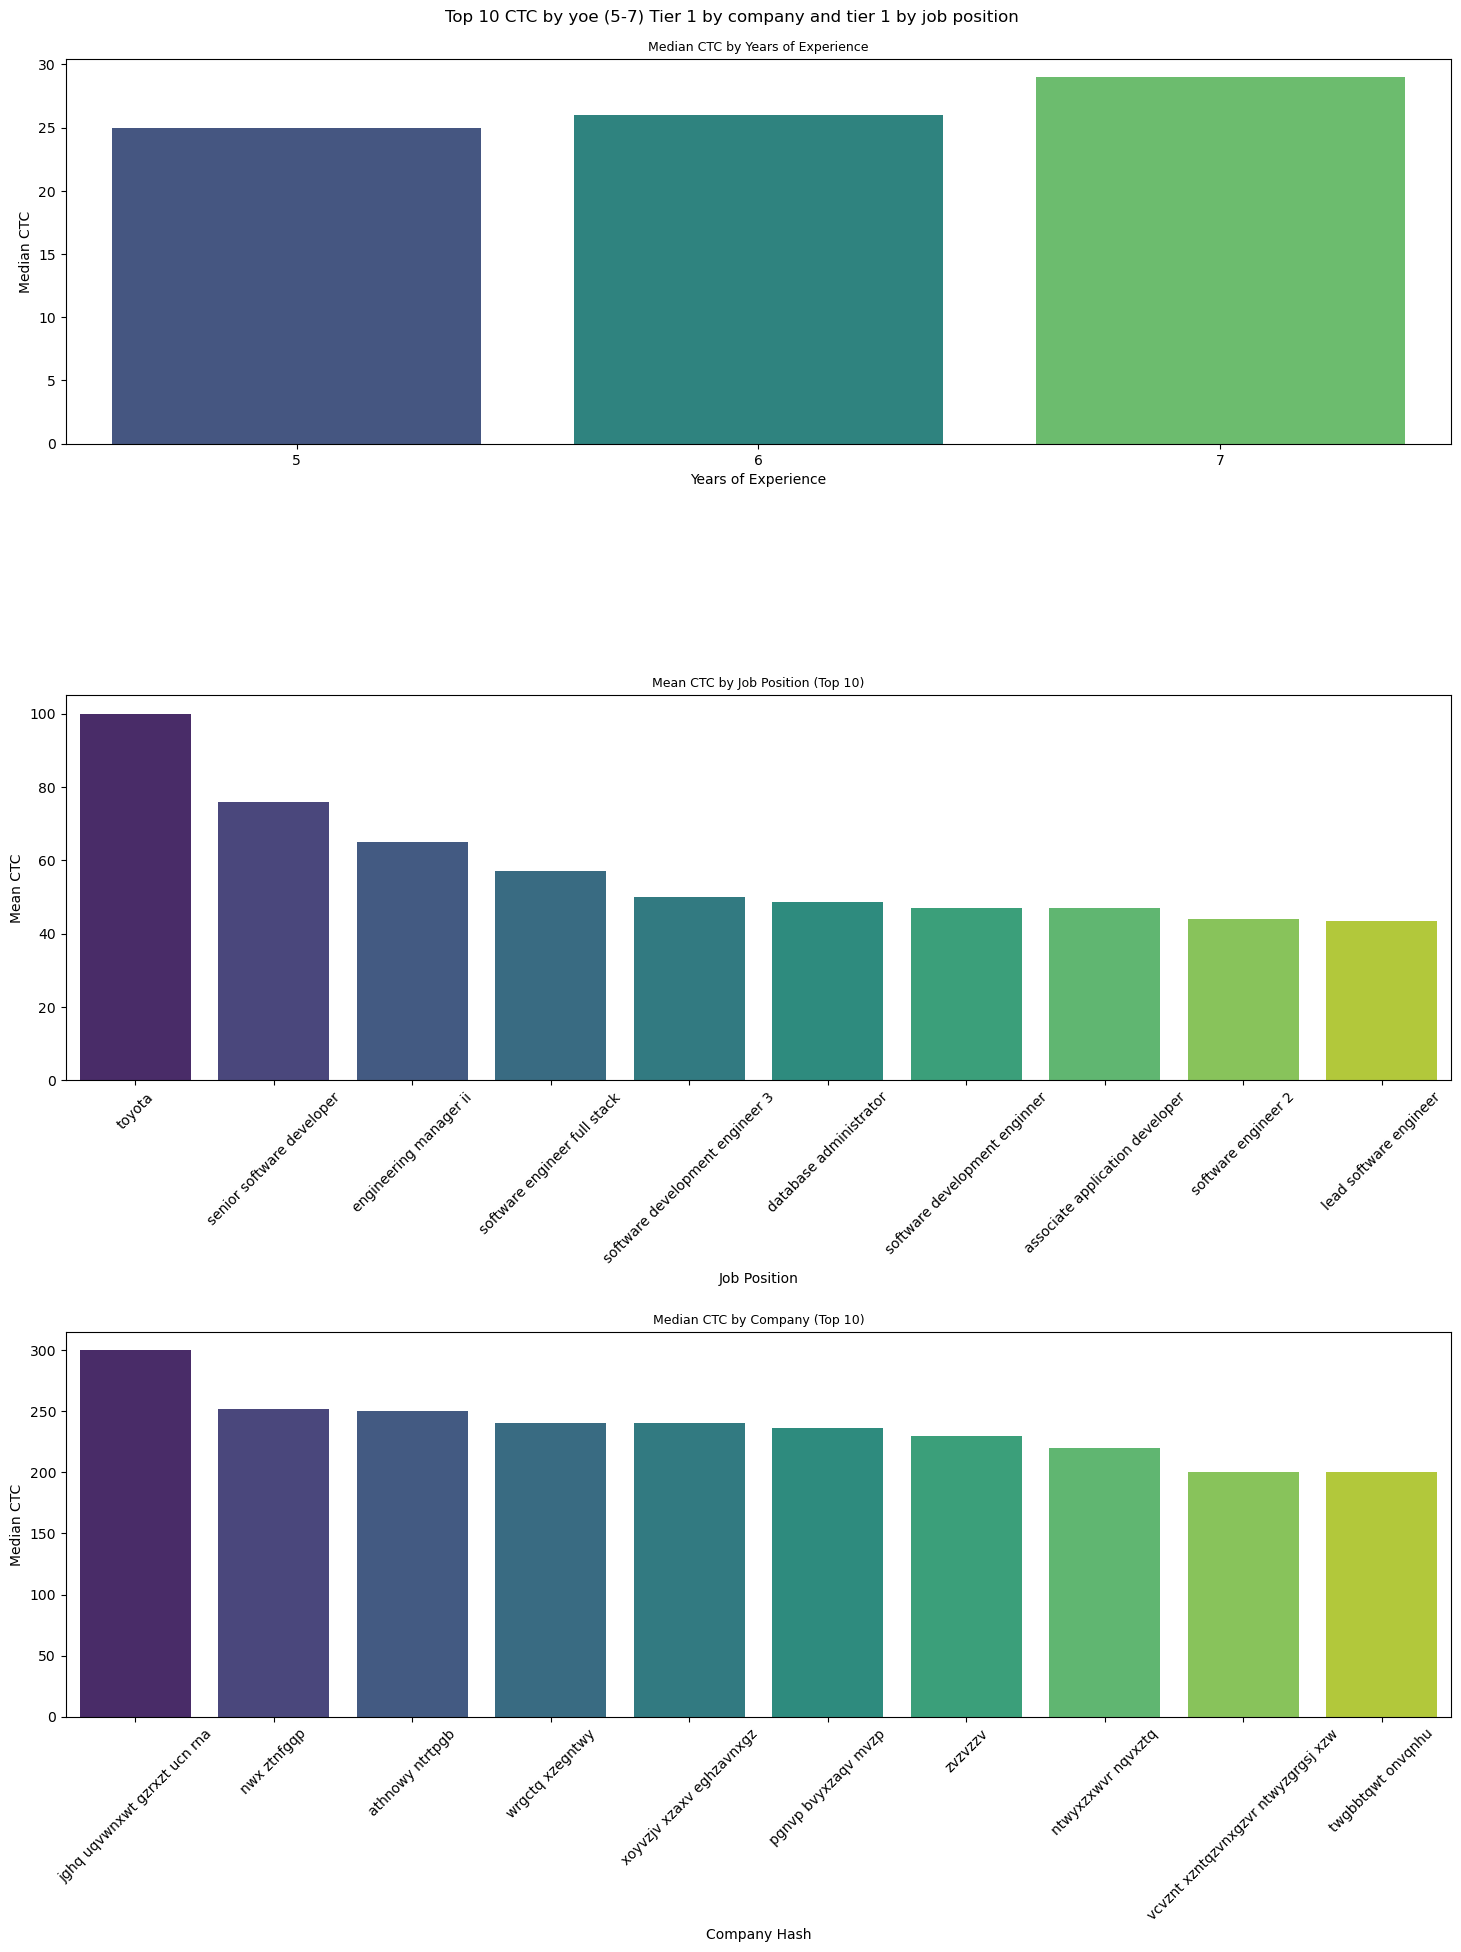

In [187]:


fig, axes = plt.subplots(3, 1, figsize=(15, 20))


sns.barplot(x=temp.groupby('Years_of_Experience')['ctc'].median().index, 
            y=temp.groupby('Years_of_Experience')['ctc'].median().values, 
            ax=axes[0], palette="viridis")
axes[0].set_title(fontsize =9 , label ='Median CTC by Years of Experience')
axes[0].set_xlabel('Years of Experience')
axes[0].set_ylabel('Median CTC')

# Second subplot: Mean CTC by Job Position (Top 10)
sns.barplot(x=temp.groupby('job_position')['ctc'].mean().sort_values(ascending=False).head(10).index, 
            y=temp.groupby('job_position')['ctc'].mean().sort_values(ascending=False).head(10).values, 
            ax=axes[1], palette="viridis")
axes[1].set_title(fontsize =9 , label ='Mean CTC by Job Position (Top 10)')
axes[1].set_xlabel('Job Position')
axes[1].set_ylabel('Mean CTC')
axes[1].tick_params(axis='x', rotation=45)

# Third subplot: Median CTC by Company (Top 10)
sns.barplot(x=temp.groupby('company_hash')['ctc'].median().sort_values(ascending=False).head(10).index, 
            y=temp.groupby('company_hash')['ctc'].median().sort_values(ascending=False).head(10).values, 
            ax=axes[2], palette="viridis")
axes[2].set_title(fontsize =9 , label ='Median CTC by Company (Top 10)')
axes[2].set_xlabel('Company Hash')
axes[2].set_ylabel('Median CTC')
axes[2].tick_params(axis='x', rotation=45)
plt.suptitle("Top 10 CTC by yoe (5-7) Tier 1 by company and tier 1 by job position")
# Adjust layout
plt.tight_layout(pad =2)



# Show the plots
plt.show()

del temp,groups,top_10_per_group

* based on yoe median salary is increasing +vely 
* most the top 10 earners are senior developers earning on an avg 57 lpa 


# Top 10 companies (based on their CTC)

In [188]:
temp =data[data['company_ctc_bin']=='high']
display(temp.groupby('company_hash')['ctc'].mean().sort_values(ascending = False).head(10))
del temp

company_hash
qvxatq avnv otqcxwt ucn rna     310.0
jghq uqvwnxwt gzrxzt ucn rna    300.0
vr zvootq wgbuvzj               300.0
vo                              300.0
xxblgmowgb                      300.0
srgfonvq                        300.0
mqvybvzx stbo                   300.0
xzehbxz ntwyzgrgsj rru          300.0
tdurtg                          290.0
ntrtutqegqbvzwt lvxuhq          289.0
Name: ctc, dtype: float64

* top tier company pay on an avg 300 lpa 

# Top 2 positions in every company (based on their CTC)

,company_hash,job_position,ctc,rank
44365,uvrvaxgz,other,313.00,1.0
31525,pgnvp,database administrator,312.00,1.0
34723,qvxatq avnv otqcxwt ucn rna,other,310.00,1.0
16054,jghq uqvwnxwt gzrxzt ucn rna,other,300.00,1.0
16053,jghq uqvwnxwt gzrxzt ucn rna,backend engineer,300.00,1.0
...,...,...,...,...
52657,wjmtq vhngbgmxrto,other,2.70,2.0
30265,owxx nhbphq,fullstack engineer,2.70,1.0
34071,qtshq ntwyzgrgsj ogrhnxgz,fullstack engineer,2.69,1.0
49599,vuxagq vmqvoxct uqgahwno ucn rna,other,2.68,1.0


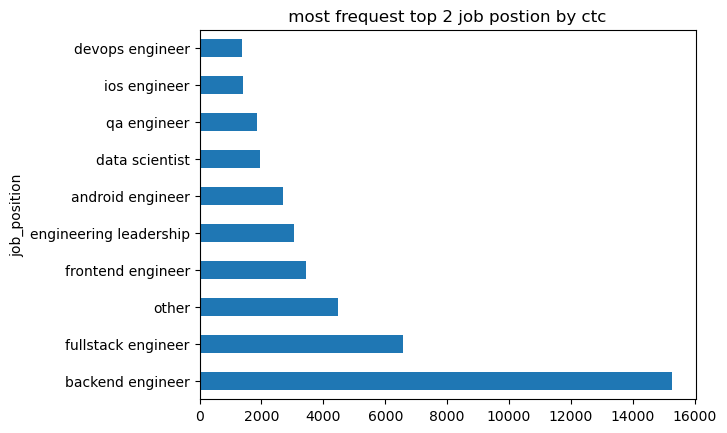

In [189]:

average_ctc = data.groupby(['company_hash', 'job_position'])['ctc'].mean().reset_index()

average_ctc_sorted = average_ctc.sort_values(by=['company_hash', 'ctc'], ascending=[True, False])


average_ctc_sorted['rank'] = average_ctc_sorted.groupby('company_hash')['ctc'].rank(method='dense', ascending=False)

top_positions = average_ctc_sorted[average_ctc_sorted['rank'] <= 2]

display(top_positions.sort_values(by =[  'ctc'  ], ascending=[False]))


top_positions['job_position'].value_counts().head(10).plot(kind='barh')
plt.title(' most frequest top 2 job postion by ctc ')
del average_ctc,average_ctc_sorted,top_positions

Feature engineering/encoding 

In [190]:
def transform_features_range(data  , group_by = 'company_hash' , agg_col = 'orgyear' , feature_name='company_exp_range'):
    mapper =data.groupby(group_by)[agg_col].agg(['min','max']).apply(lambda x : x['max']-x['min'] , axis =1).fillna(0).to_dict() 
    data[feature_name] = data[group_by].map(mapper)
    return data


def transform_features_min(data  , group_by = 'company_hash' , agg_col = 'orgyear' , feature_name='company_min_exp'):
    mapper = data.groupby('company_hash')[agg_col].min().fillna(0).to_dict()
    data[feature_name] = data[group_by].map(mapper)
    return data

def transform_features_max(data  , group_by = 'company_hash' , agg_col = 'orgyear' , feature_name='company_max_exp'):
    mapper = data.groupby('company_hash')[agg_col].max().fillna(0).to_dict()
    data[feature_name] = data[group_by].map(mapper)
    return data


def transform_features_std(data  , group_by = 'company_hash' , agg_col = 'orgyear' , feature_name='company_exp_std'):
    mapper = data.groupby('company_hash')[agg_col].std().fillna(0).to_dict()
    data[feature_name] = data[group_by].map(mapper)
    return data



# Add range features

data = transform_features_range(data=data, group_by='company_hash', agg_col='ctc', feature_name='company_ctc_range')

data = transform_features_range(data=data, group_by='company_hash', agg_col='Years_of_Experience', feature_name='company_Years_of_Experience_range')

# Add minimum features
data = transform_features_min(data=data, group_by='company_hash', agg_col='ctc', feature_name='company_min_ctc')
data = transform_features_min(data=data, group_by='company_hash', agg_col='Years_of_Experience', feature_name='company_min_Years_of_Experience')

# Add maximum features

data = transform_features_max(data=data, group_by='company_hash', agg_col='ctc_updated_year', feature_name='company_max_ctc_updated_year')


# Add standard deviation features

data = transform_features_std(data=data, group_by='company_hash', agg_col='ctc', feature_name='company_std_ctc')



# selecting subset of data for faster training

In [191]:
data =data.sample(frac = 0.08, random_state = 42)

In [192]:
# keeping a copy of orignal data 



orignal_data =data[[ 'company_hash' , 'email_hash' , 'job_position' , 'ctc' ,'orgyear' ,'ctc_updated_year' ,'Years_of_Experience'] ].copy(deep=True)
orignal_data

mapper =data.groupby('job_position')['ctc'].mean().fillna(0).to_dict()

data['job_position']=data['job_position'].map(mapper )

data.drop(columns=['email_hash' ,'company_hash' ,'orgyear' , 'ctc_updated_year'],inplace=True)

data.drop(columns=['id'],inplace=True)

# ohe

In [193]:
# one hot encoding all these features

ohe_cols =data.select_dtypes(include='object').columns

ohe_data =pd.get_dummies(data[ohe_cols],drop_first=True ,dtype=float)

data =pd.concat([data,ohe_data],axis=1)
data.drop(columns=ohe_cols,inplace=True)

In [194]:
# standard scaling all these features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
std_data = scaler.fit_transform(data)
std_data=pd.DataFrame(std_data, columns= data.columns)
del data 

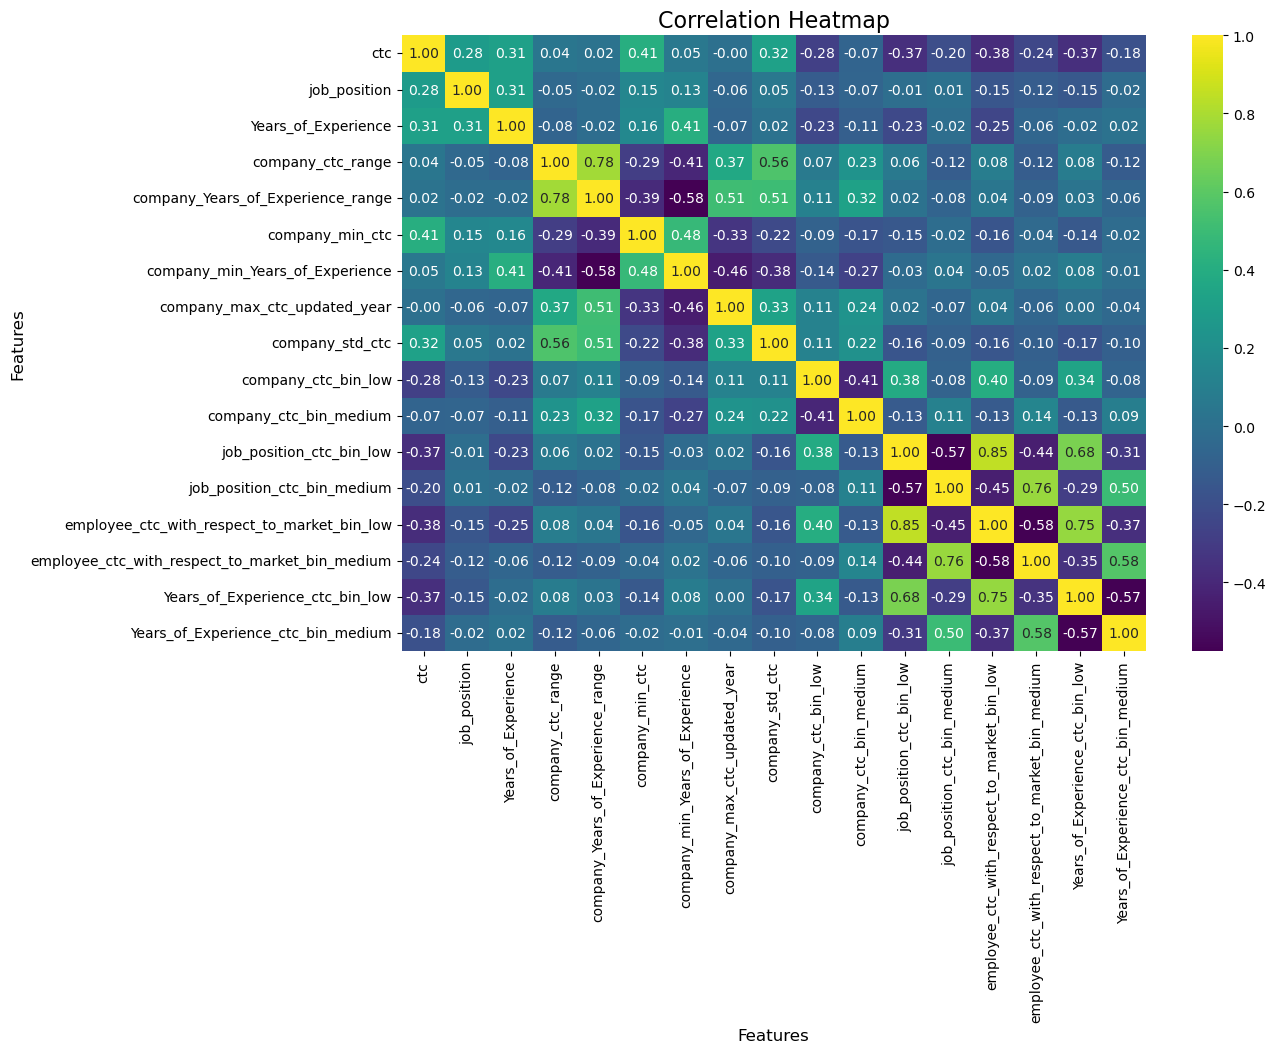

In [195]:

plt.figure(figsize=(12, 8))


sns.heatmap(std_data.corr(), cmap='viridis', annot=True, fmt=".2f", annot_kws={"size": 10})

# Set title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Show the plot
plt.show()



# clustering 

In [196]:
# visualisation purpuse
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(std_data)
std_2d = pca.transform(std_data)

In [197]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


# kmeans 

/Users/aditya/miniconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aditya/miniconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aditya/miniconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aditya/miniconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

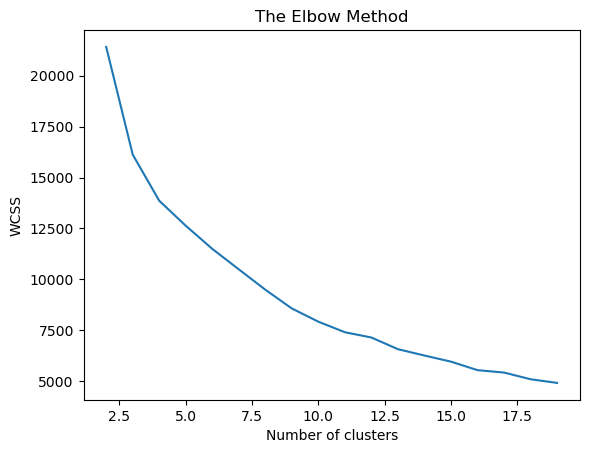

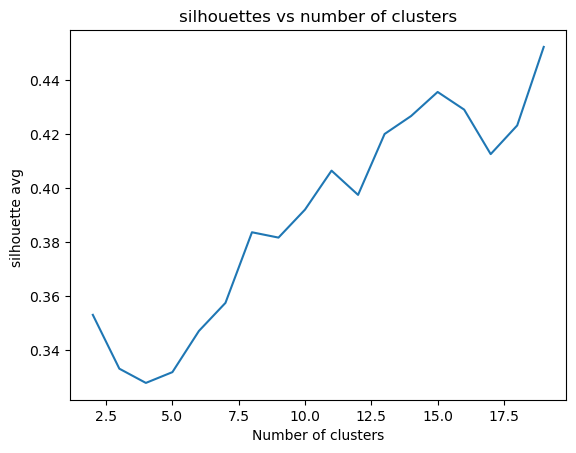

In [198]:
# finding the best number of clusters
wcss = []
silhouettes = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(std_data)
    labels = kmeans.fit_predict(std_data)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(std_data, labels)
    silhouettes.append(silhouette_avg)
    
plt.plot(range(2, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(range(2, 20), silhouettes)
plt.title('silhouettes vs number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette avg ')
plt.show()



* cant decide no of clusters based on elbow plot 
* from silhouette score fixing no of cluster to 18

# AgglomerativeClustering

/Users/aditya/miniconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/aditya/miniconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/aditya/miniconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/aditya/miniconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/aditya/miniconda3/envs/pytorch/lib/python

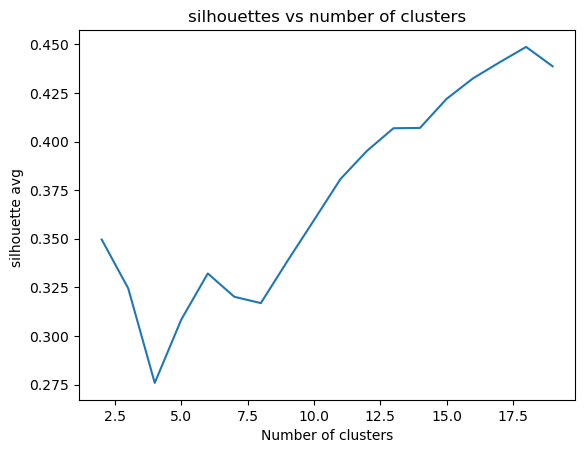

In [199]:
# # finding the best number of clusters

silhouettes = []
for i in range(2, 20):
    hc = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward' )
    labels = hc.fit_predict(std_data)

    silhouette_avg = silhouette_score(std_data, labels)
    silhouettes.append(silhouette_avg)
    

plt.plot(range(2, 20), silhouettes)
plt.title('silhouettes vs number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette avg ')
plt.show()



* its look 18 is good cluster number to choose based on silhouette score 


/Users/aditya/miniconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aditya/miniconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.423


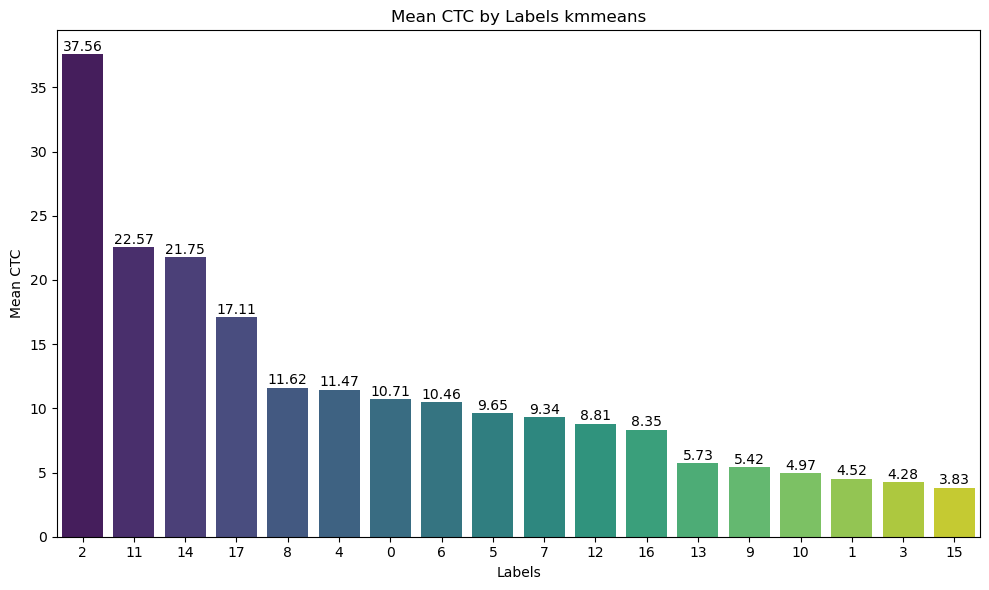

In [200]:
kmeans = KMeans(n_clusters = 18, init = 'k-means++', random_state = 42)
kmeans.fit(std_data)
labels = kmeans.fit_predict(std_data)
silhouette_avg = round(silhouette_score(std_data, labels),3)
print(silhouette_avg) 
orignal_data['labels']=labels





temp = orignal_data.groupby('labels')['ctc'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
ax = sns.barplot(x=temp.index, y=temp.values, order=temp.index, palette="viridis")


for i, v in enumerate(temp.values):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')


plt.title('Mean CTC by Labels kmmeans')
plt.xlabel('Labels')
plt.ylabel('Mean CTC')


plt.tight_layout()
plt.show()







* cluster 2  are highest earner 
* cluster [11 , 14 ,17 ] are above average earner 
* cluster [8,4,0,6,7,12,16] are medium earner 
* cluster 15 are bottom earner 


In [201]:
hc = AgglomerativeClustering(n_clusters = 18, affinity = 'euclidean', linkage = 'ward' )
labels = hc.fit_predict(std_data)
silhouette_avg = round(silhouette_score(std_data, labels),3)
orignal_data['labels']=labels

/Users/aditya/miniconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


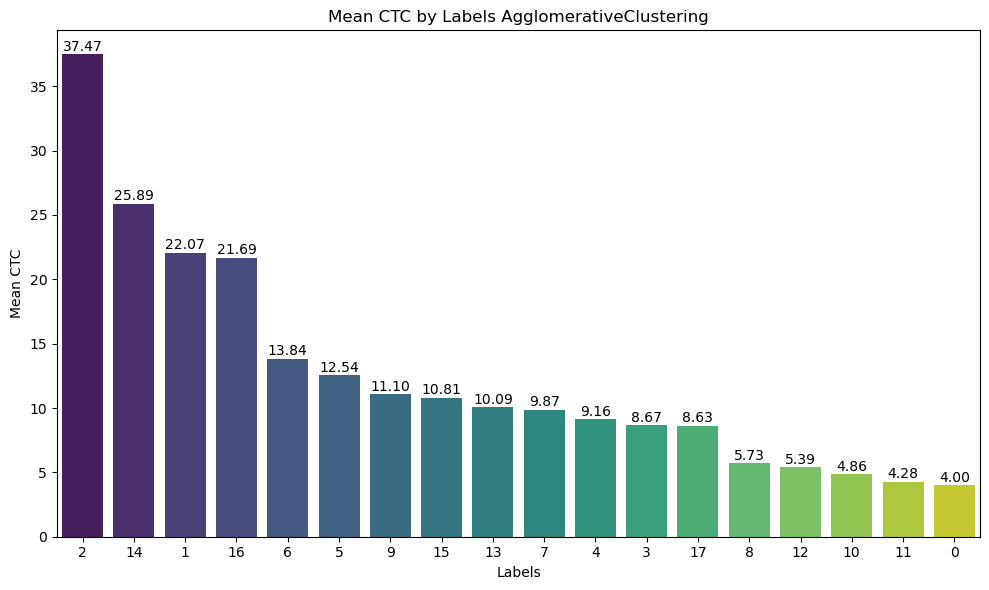

In [202]:



temp = orignal_data.groupby('labels')['ctc'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
ax = sns.barplot(x=temp.index, y=temp.values, order=temp.index, palette="viridis")


for i, v in enumerate(temp.values):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')


plt.title('Mean CTC by Labels AgglomerativeClustering')
plt.xlabel('Labels')
plt.ylabel('Mean CTC')


plt.tight_layout()
plt.show()





* cluster 2 are highest earner 
* cluster [14 ,1 ,16] are above average earner 
* cluster [6, 7, 1, 15, 13,17, 4, 5] are medium earner 
* cluster 0 are bottom earner 

Insight:

- Salary ranges widely from hundreds to 2000 lakhs per annum, with a highly right-skewed distribution.
- The median salary is around 10 LPA.
- Software engineering jobs typically pay the most.
- Experienced professionals generally have higher median salaries.
- For each experience range (0-14 years), the average maximum salary is 300 LPA.
- The median salary increases with experience, but after 25 years, it falls.
- There are very few individuals with more than 25 years of experience.
- There is high variability in salaries for 0-15 years of experience; some earn very low, some very high.
- 93% of the workforce has 0-12 years of experience, only 7% have more than that.
- Salary for data science jobs ranges from 10 LPA to 242 LPA.
- 50% of the top 10 employees in data science companies earn more than 23 LPA.
- The bottom 10 data science employees earn anywhere from 1 LPA to 12 LPA.
- 50% of the bottom 10 employees in data science companies earn less than 3.7 LPA.

**Company CTC Bin**:
- **High**: 41.12% of employees earn more than the company's average CTC.
- **Medium**: 34.02% of employees earn around the company's average CTC.
- **Low**: 24.87% of employees earn less than the company's average CTC.

**Job Position CTC Bin**:
- **Medium**: 48.35% of employees earn around the job position's average CTC.
- **High**: 26.11% of employees earn more than the job position's average CTC.
- **Low**: 25.54% of employees earn less than the job position's average CTC.

**Employee CTC with Respect to Market Bin**:
- **Medium**: 49.94% of employees earn around the market average CTC.
- **High**: 25.03% of employees earn more than the market average CTC.
- **Low**: 25.03% of employees earn less than the market average CTC.

**Years of Experience CTC Bin**:
- **Medium**: 47.56% of employees earn around the average CTC for their years of experience.
- **Low**: 26.54% of employees earn less than the average CTC for their years of experience.
- **High**: 25.90% of employees earn more than the average CTC for their years of experience.